<a href="https://colab.research.google.com/github/beatriz0freitas/PL/blob/main/PL_EX02_Regular_Expressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX02: Regular Expressions

## Language Processing

## LEI/2025-26

#### Nuno Macedo
#### (Several exercises originally by Sofia Pinto)
Universidade do Minho

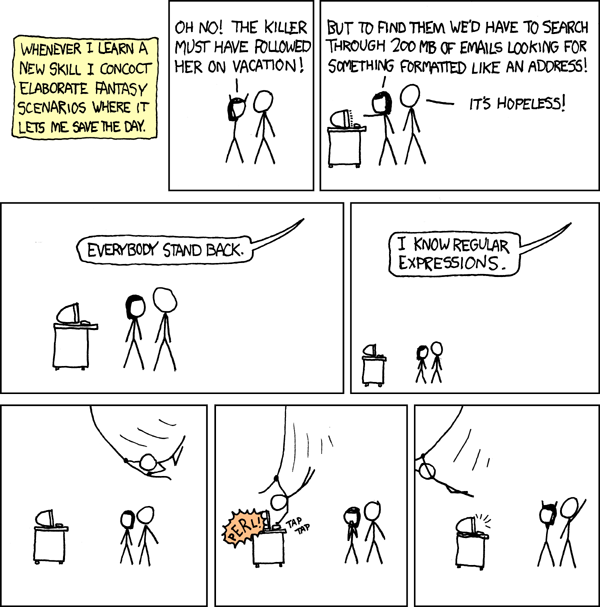

[xkcd](https://xkcd.com/208/)

# Regular Expressions

- Regular expressions (REs) allow us to encode a class of languages called *regular*

- In theory, the fundamental operators to define a regular language are concatenation, union (`|`) and Kleene closure (`*`)

- In practice, RE processors support richer languages to ease the writing

- In this notebook, we use the Perl-like syntax, also followed by Python

- For the following exercises, consider the following operators:

  - Special symbols
    - `.` matches any symbol except a new line
    - `^` matches the start of the string
    - `$` matches the end of the string

  - Repetition
    - `*` matches any repetition of the preceding RE
    - `+` matches one or more repetitions of the preceding RE
    - `?` matches 0 or 1 repetitions of the preceding RE
    - `{n}` matches exactly `n` repetitions of the preceding RE
    - `{m,n}` matches between `n` and `m` repetitions of the preceding RE

  - `|` union (alternative) of two REs

  - `[...]` creates a group of alternative symbols
    - `-` can be used for ranges of symbols (to match `-`, put it in the beginning or end of group)
    - `^` denotes the complement, all symbols except those declared
    - All symbols treated as literal inside group except `-`, `]` and `^`
    
  - Symbol groups
    - `\d` for any digit symbol
    - `\s` for any whitespace symbol
    - `\w` any alpha-numeric symbol plus the underscore `_`
    - `\b` matches the boundary of words without consuming any symbol
    - Upper-case versions for complement set (e.g., `\D` for any symbol that is **not** a digit)
    

## Exercise 1

Write regular expressions to define the described regular languages.

Extra: Using any text editor you can validate you regular expressions against this [`registry.csv`](https://elearning.uminho.pt/ultra/courses/_68099_1/outline/file/_1781915_1) file, which, for each field, has exactly 45 valid ones, and 5 invalid ones.

📌 *Note:* we do not condone storing passwords as plain text :)

### Exercise 1.1

The language of valid [Portuguese postal codes](https://en.wikipedia.org/wiki/Postal_codes_in_Portugal), formed by **four digits, a hyphen, then three digits**.

### Exercise 1.2

The language of phone numbers with **exactly 9 digits preceded by an optional country code of 1 to 3 digits between parenthesis**.

### Exercise 1.3

The language of valid Portuguese licence plates (image from [wikipedia](https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_Portugal)).
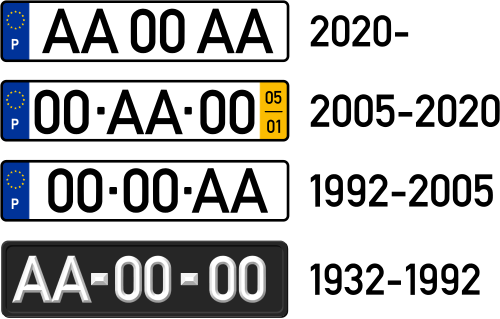

### Exercise 1.4

The language of [valid email addresses](https://en.wikipedia.org/wiki/Email_address#Syntax) `local@domain` according to the **following simplified rules**:

  - The `local` part cannot be empty, and can have alphanumerical symbols, underscores `_` and dots `.`, but dots cannot be at the beginning, end, or together `..`
  - The domain part contains at least two, non-empty, alphanumerical labels separated by `.`

### Exercise 1.5

The language of passwords that follow a simple [password policy](https://en.wikipedia.org/wiki/Password_policy) that consists of the **following rule**:
  - at least one alphabetical character and at least one numerical character

# Python's `re` module

- `re` is Python's built-in module for using regular expressions

- Very rich module with advanced features, based on the well-known Perl syntax (see [documentation]([`re`](https://docs.python.org/3/library/re.html)))

In [ ]:
import re

⚠️ *Note*: To avoid clashes between special RE symbols and regular escaped characters, define REs as raw string literals `r"..."`


In [ ]:
text = "hello world"

regex = "\\w+" # regular string
print(re.findall(regex,text))

regex = r"\w+" # raw string
print(re.findall(regex,text))

['hello', 'world']
['hello', 'world']


## Functions `match`, `fullmatch`, `search`, `findall`

- `re.match(regex, text)` tries to match `regex` from the beginning of `text`

- `re.fullmatch(regex, text)` tries to match `regex` from the beginning to the end `text`

- `re.search(regex, text)` tries to match `regex` anywhere in `text` (will return first occurrence)

- `re.finditer(regex, text)` returns an iterator over all (non-overlapping) matches of `regex` in `text`

- `re.findall(regex, text)` returns all (non-overlapping) substrings of `text` matched bt `regex`


- All these functions, except `findall()`, return `Match` objects with information about the matched substring

- For a `Match` `m`:
  - `m.group()` retrieves the matched substring
  - `m.span()` (or `m.start()` and `m.end()`) returns indexes matched by the substring in the full string



In [ ]:
text = "no, no, nooo!"

In [ ]:
print(re.match(r"no",text))
print(re.match(r"nooo",text))

<re.Match object; span=(0, 2), match='no'>
None


In [ ]:
print(re.fullmatch(r"no",text))
print(re.fullmatch(r"no.*",text))
print(re.fullmatch(r"nooo.*",text))
print(re.fullmatch(r".*nooo.*",text))

None
<re.Match object; span=(0, 13), match='no, no, nooo!'>
None
<re.Match object; span=(0, 13), match='no, no, nooo!'>


In [ ]:
print(re.search(r"no",text))
print(re.search(r"nooo",text))

<re.Match object; span=(0, 2), match='no'>
<re.Match object; span=(8, 12), match='nooo'>


In [ ]:
print(list(re.finditer(r"no",text)))
print(list(re.finditer(r"nooo",text)))

[<re.Match object; span=(0, 2), match='no'>, <re.Match object; span=(4, 6), match='no'>, <re.Match object; span=(8, 10), match='no'>]
[<re.Match object; span=(8, 12), match='nooo'>]


In [ ]:
print(re.findall(r"no",text))
print(re.findall(r"nooo",text))

['no', 'no', 'no']
['nooo']


## RE processing flags

- The behavior of the RE processor can be customized through *flags*

- These flags may be
  - *global*, it passed to the functions through an optional parameter
  - *local*, if defined as a special inline group within the regular expression

- Useful flags are:
  - To ignore case of alphabetic symbols (global `re.I` or `re.IGNORECASE`, local `(?i)`)
  - To treat each line independently, changing the behavior of `^` and `$` (global `re.M` or `re.MULTILINE`, local `(?m)`)

- To apply multiple flags, merge them with bitwise or `|`

In [ ]:
text = "no, no, NOOOO!"

In [ ]:
print("All no's, case sensitive:", re.findall(r"no",text))

All no's: ['no', 'no']


In [ ]:
print("All no's, case insensitive:", re.findall(r"no",text,re.I))

All no's, case insensitive: ['no', 'NO', 'no']


In [ ]:
print("All no's, case insensitive:", re.findall(r"(?i)no",text))

All no's, case insensitive: ['no', 'NO', 'no']


In [ ]:
text = """no
NO
nooo!
"""

In [ ]:
print("All starting no's, single-line:", re.findall(r"^no",text))

All starting no's, single-line: ['no']


In [ ]:
print("All starting no's, multi-line:", re.findall(r"^no",text,re.M))

All starting no's, multi-line: ['no', 'no']


In [ ]:
print("All starting no's, single-line, case insensitive:", re.findall(r"^no",text,re.M|re.I))

All starting no's, single-line, case insensitive: ['no', 'NO', 'no']


## Exercise 2

Write Python functions to determine whether a given string fully matches the patterns described in the function's documentation. Use functions `match()` or `fullmatch()` from module `re`.

In [ ]:
import doctest

### Exercise 2.1

In [ ]:
def iso_date(text):
  """
  Tests whether a string represents an ISO date, i.e., it has the format YYYY-MM-DD.

  >>> iso_date("2046-10-23")
  True
  >>> iso_date("14-09-2016")
  False
  >>> iso_date("2036--12-13")
  False
  >>> iso_date("2054-2-3")
  False
  """
  return None

doctest.run_docstring_examples(iso_date, globals())

### Exercise 2.2

In [ ]:
def floatNum(word):
    """
    Tests whether a string represents a floating point number, with optional
    sign and exponent.

    >>> floatNum("-0.2")
    True
    >>> floatNum("3.4032E23")
    True
    >>> floatNum("+.2034")
    True
    >>> floatNum("10.203.4")
    False
    >>> floatNum("0034.203400e-2")
    True
    """
    return None

doctest.run_docstring_examples(floatNum, globals())

### Exercise 2.3

In [ ]:
def email(text):
  """
  Tests whether a string is a valid email address, according to the simplified
  rules from Exercise 1.4.

  >>> email("luke.skywalker@rebels.net")
  True
  >>> email("leia_organa@rebels.net")
  True
  >>> email(".han.solo@falcon.space")
  False
  >>> email("darth..vader@empire.gov")
  False
  >>> email("frodo.baggins@sh+re.me")
  False
  >>> email("x@x.x")
  True
  """
  return None

doctest.run_docstring_examples(email, globals())

### Exercise 2.4

In [ ]:
def files_8_3(lst):
  """
  Identify from a list of filenames, those that are 8.3 filenames
  (https://en.wikipedia.org/wiki/8.3_filename).

  >>> files_8_3(["AUTOEXEC.BAT", "CONFIG.SYS", "COMMAND.COM"])
  ['AUTOEXEC.BAT', 'CONFIG.SYS', 'COMMAND.COM']

  >>> files_8_3(["DOOM.EXE", "MONKEY~1.BAT", "B.A.S.S.EXE"])
  ['DOOM.EXE', 'MONKEY~1.BAT']

  >>> files_8_3(["SIMCITY.exe", "DUKE3D.EXE", "LEMMINGS"])
  ['DUKE3D.EXE', 'LEMMINGS']
  """
  return None

doctest.run_docstring_examples(files_8_3, globals())

## REs for text processing

- In practice, we usually use REs to detect substring matches within a larger text

- We must reason about how these matches are selected from the full text


### Capturing groups

- Enclosing part of the RE in `( ... )` creates a *capturing group*

- To group expressions with parenthesis without capturing, `(?: ... )` should be used

- A `Match` object `m` contains a group for each matching group in the RE
  - `m.group(n)` or `m.span(n)` retrieve the information for group $n$
  - group $0$ is the full string, group $n > 0$ is the $n$th matched group

In [ ]:
url = "https://alunos.uminho.pt/pt/estudantes/paginas/infouteishorarios.aspx"

In [ ]:
# match a URL
regex = r".+://[a-z0-9.-]+(/.*)?"
print("Full match:",re.match(regex, url).group(0))

Full match: https://alunos.uminho.pt/pt/estudantes/paginas/infouteishorarios.aspx


In [ ]:
# catch only the hostname of a URL
regex = r".+://([a-z0-9.-]+)(/.*)?"
print("Full match:",re.match(regex, url).group(0))
print("1st group:",re.match(regex, url).group(1))

Full match: https://alunos.uminho.pt/pt/estudantes/paginas/infouteishorarios.aspx
1st group: alunos.uminho.pt


In [ ]:
# catch only the hostname and the protocol of a URL
regex = r"(.+)://([a-z0-9.-]+)(/.*)?"
print("Full match:",re.match(regex, url).group(0))
print("1st group:",re.match(regex, url).group(1))
print("2nd group:",re.match(regex, url).group(2))

Full match: https://alunos.uminho.pt/pt/estudantes/paginas/infouteishorarios.aspx
1st group: https
2nd group: alunos.uminho.pt


### Lazy vs. greedy repetitions

- Withing a larger text, the same RE may be matched in different ways
  - Is `AAA` is recognized by `A*`
  - But what match should be returned?
    - ɛ
    - `A`
    - `AA`
    - `AAA`

- RE processors provide *greedy* and *lazy* versions of repetition operators
  - Default versions are greedy
  - Operators `*?`, `+?` or `{m,n}?` are lazy versions that stop unrolling as soon as a match is found

In [ ]:
text = "AAA"

In [ ]:
greedy = r"A*"
print("Greedy:", re.match(greedy, text))

lazy = r"A*?"
print("Lazy:", re.match(lazy, text))

Greedy: <re.Match object; span=(0, 3), match='AAA'>
Lazy: <re.Match object; span=(0, 0), match=''>


In [ ]:
greedy = r"A*"
print("Greedy:", re.findall(greedy, text))

lazy = r"A*?"
print("Lazy:", re.findall(lazy, text))

Greedy: ['AAA', '']
Lazy: ['', 'A', '', 'A', '', 'A', '']


## Exercise 3

Write functions to retrieve all occurrences in a given text of the patterns described in the function's documentation. Use functions `finditer()` or `findall()` from module `re`.

### Exercise 3.1

In [ ]:
def proper(text):
  """
  Retrieves all proper nouns from a text. A proper noun is any sequence of words
  that starts with an upper-case letter, except if it is in the beginning of a
  sentence.

  >>> proper("In the beginning, Earth was without Form, and Void.")
  ['Earth', 'Form', 'Void']
  >>> proper("King Llane of Azeroth prepares his armies against the Orc Horde.")
  ['Llane', 'Azeroth', 'Orc Horde']
  >>> proper("Look behind you, a Three-Headed Monkey!")
  ['Three-Headed Monkey']
  >>> proper("Roger Wilco returns to Labion, facing Sludge Vohaul’s latest scheme.")
  ['Wilco', 'Labion', 'Sludge Vohaul']
  """
  return None

doctest.run_docstring_examples(proper, globals())

### Exercise 3.2

In [ ]:
def sum_uints(text):
  """
  Sums all occurrences of unsigned integers numbers in a text.

  >>> sum_uints("Year 4000 BC: Your civilization has accumulated 12 culture points.")
  4012

  >>> sum_uints("Current population: 27000 and your budget surplus is 5000 credits.")
  32000

  >>> sum_uints("You have 7 fuel units remaining and 20 credits in your account.")
  27

  >>> sum_uints("Your current score is 350 points, and you have found 12 secrets.")
  362
  """
  return None

doctest.run_docstring_examples(sum_uints, globals())

### Exercise 3.3

In [ ]:
def sum_ints(text):
  """
  Sums all occurrences of possibly unsigned integers numbers in a text.

  >>> sum_ints("Year 4000 BC: Your civilization has accumulated +12 culture points.")
  4012

  >>> sum_ints("Current population: 27000 and your budget surplus is -5000 credits.")
  22000

  >>> sum_ints("You have +7 fuel units remaining and -20 credits in your account.")
  -13

  >>> sum_ints("Your current score is +350 points, and you have found 12 secrets.")
  362
  """
  return None

doctest.run_docstring_examples(sum_ints, globals())

### Exercise 3.4

In [ ]:
def euros(text):
  """
  Retrieves all occurrences of euro € quantities from a text.

  >>> euros("I had 30€, I spent 20  €. And the total is 20.309€???")
  ['30', '20', '20.309']
  >>> euros("Yes, you had 30€ and spent €20. But the total is not 20.309 €, it's € 20.40.")
  ['30', '20', '20.309', '20.40']
  >>> euros("Actually it was €  30.30. So 20.309€,€20.40 maybe?")
  ['30.30', '20.309', '20.40']
  >>> euros("All this € talk is nonsense.")
  []
  """
  return None

doctest.run_docstring_examples(euros, globals())

## Group matching

- Captured groups can also be referred elsewhere in RE to test for pattern repetition

   - Each captured group is assigned an identifier *`n`* starting at 1, and *`\n`* refers to that group


In [ ]:
text = "BABA NEAR KEKE IS YOU"

regex = r"\b(\w+)\1\b"

print(re.findall(regex, text))

['BA', 'KE']


## Function `sub`

- `re.sub(regex, repl, text)` replaces all matches of `regex` in `text` by `repl`

- `repl` can be:
  - a string that can refer to the `regex` capturing groups
  - a function that processes `Match` objects

In [ ]:
name = "Princess    Rosella,  of Daventry"

In [ ]:
# clean up spaces and punctuation
print(re.sub(r"\W+", r" ", name))

Princess Rosella of Daventry


In [ ]:
# find first and last name, direct group references
print(re.sub(r"^(\w+).*\b(\w+$)", r"\2, \1", name))

Daventry, Princess


In [ ]:
# find first and last name, auxiliary function
def normalize_name(m):
  return f"{m.group(2)}, {m.group(1)}"

print(re.sub(r"^(\w+).*\b(\w+$)", normalize_name, name))

Daventry, Princess


## Exercise 4

Write functions to replace all (non-overlapping) occurrences of a pattern in a given text. Use function `sub()` from module `re`.

### Exercise 4.1


In [ ]:
texto = """A 03/01/2022, V foi de férias com a sua família.
Ficaram hospedados num hotel e aproveitaram as férias para passear e descobrir novos locais.
Mais tarde, no dia 12/01/2022, V voltou para casa e começou a trabalhar num novo projeto.
Passou muitas horas no computador, mas finalmente terminou o projeto a 15/01/2022.
Alguns meses depois, a 26/09/2023, V casou-se com Judy e no dia 30/09/2023 partiram na
sua lua-de-mel para o local onde V tinha ido de férias no ano anterior."""

def iso_8601(text):
  """
  Convert dates written in DD/MM/AAAA format to the ISO 8601 format AAAA-MM-DD.

  >>> print(iso_8601(texto))
  A 03-01-2022, V foi de férias com a sua família.
  Ficaram hospedados num hotel e aproveitaram as férias para passear e descobrir novos locais.
  Mais tarde, no dia 12-01-2022, V voltou para casa e começou a trabalhar num novo projeto.
  Passou muitas horas no computador, mas finalmente terminou o projeto a 15-01-2022.
  Alguns meses depois, a 26-09-2023, V casou-se com Judy e no dia 30-09-2023 partiram na
  sua lua-de-mel para o local onde V tinha ido de férias no ano anterior.
  """
  return None

doctest.run_docstring_examples(iso_8601, globals())

### Exercise 4.2


In [ ]:
um = {
    "UM": "Universidade do Minho",
    "LEI": "Licenciatura em Engenharia Informática",
    "MEI": "Mestrado em Engenharia Informática",
    "LCC": "Licenciatura em Ciências da Computação",
    "CG": "Campus de Gualtar",
    "EG": "Engenharia Gramatical",
    "DI": "Departamento de Informática",
    "EEUM": "Escola de Engenharia da Universidade do Minho"
}

expanse = {
    "UNN": "United Nations Navy",
    "OPA": "Outer Planets Alliance",
    "MCRN": "Martian Congressional Republic Navy",
    "PDC": "Point Defense Cannon",
    "PB": "Protomolecule-Based"
}

internet = {
    "tbh": "to be honest",
    "idk": "I don't know",
    "afaik": "as far as I know",
    "imo": "in my opinion",
    "nbd": "no big deal"
}

def expand(text, dct):
  """
  Expands all occurrences of an acronyms macro /acronym{...} in a text using a
  dictionary of expansions.

  If the acronym is not in the dictionary, leaves it unchanged.

  >>> expand("/acronym{EG} is a /acronym{UC} of /acronym{MEI}, a course offered by /acronym{DI}, part of /acronym{EEUM}, part of /acronym{UM}, in /acronym{CG}.", um)
  'Engenharia Gramatical is a UC of Mestrado em Engenharia Informática, a course offered by Departamento de Informática, part of Escola de Engenharia da Universidade do Minho, part of Universidade do Minho, in Campus de Gualtar.'

  >>> expand("The /acronym{UNN} flagged an /acronym{OPA} skiff, so the /acronym{MCRN} launched a /acronym{PDC}-armed frigate; the /acronym{XO} suspected /acronym{PB} tech.", expanse)
  'The United Nations Navy flagged an Outer Planets Alliance skiff, so the Martian Congressional Republic Navy launched a Point Defense Cannon-armed frigate; the XO suspected Protomolecule-Based tech.'

  >>> expand("/acronym{tbh}, /acronym{idk} what happened /acronym{afaik}, but /acronym{imo} it's /acronym{nbd} - just chill, /acronym{lol}.", internet)
  "to be honest, I don't know what happened as far as I know, but in my opinion it's no big deal - just chill, lol."
  """
  return None

doctest.run_docstring_examples(expand, globals())

### Exercise 4.3

In [ ]:
texto = """Num lindo dia de [ESTAÇÃO DO ANO], [NOME DE PESSOA] foi passear com o seu [EXPRESSÃO DE PARENTESCO MASCULINA].
Quando chegaram à [NOME DE LOCAL FEMININO], encontraram um [OBJETO MASCULINO] muito [ADJETIVO MASCULINO].
Ficaram muito confusos, pois não conseguiam identificar a função daquilo.
Seria para [VERBO INFINITIVO]? Tentaram perguntar a [NOME DE PESSOA FAMOSA], que também não sabia.
Desanimados, pegaram no objeto e deixaram-no no [NOME DE LOCAL MASCULINO] mais próximo.
Talvez os [NOME PLURAL MASCULINO] de lá conseguissem encontrar alguma utilidade para aquilo."""

def mad_libs():
  """
  Implement a Mad Libs word game, where the computer asks the user words to
  replace [placeholders] in the original text.
  """
  return None

mad_libs()

Give me a ESTAÇÃO DO ANO: Verão
Give me a NOME DE PESSOA: Maria
Give me a EXPRESSÃO DE PARENTESCO MASCULINA: irmão
Give me a NOME DE LOCAL FEMININO: feira
Give me a OBJETO MASCULINO: caixote
Give me a ADJETIVO MASCULINO: grande
Give me a VERBO INFINITIVO: comer
Give me a NOME DE PESSOA FAMOSA: Camões
Give me a NOME DE LOCAL MASCULINO: café
Give me a NOME PLURAL MASCULINO: bandidos
Num lindo dia de Verão, Maria foi passear com o seu irmão.
Quando chegaram à feira, encontraram um caixote muito grande.
Ficaram muito confusos, pois não conseguiam identificar a função daquilo.
Seria para comer? Tentaram perguntar a Camões, que também não sabia.
Desanimados, pegaram no objeto e deixaram-no no café mais próximo.
Talvez os bandidos de lá conseguissem encontrar alguma utilidade para aquilo.


### Exercise 4.4


In [ ]:
def rem_repeated(text):
  """
  Remove all consecutive occurrences of identical words. Words
  are considered identical regardless of case.

  >>> rem_repeated("Oh oh oh oh...")
  'Oh ...'

  >>> rem_repeated("This is is a a common mistake")
  'This is a common mistake'

  >>> rem_repeated("It was very very VERY hot.")
  'It was very hot.'
  """
  return None

doctest.run_docstring_examples(rem_repeated, globals())

## Function `split`

- `re.split(regex, text)` splits `regex` in all occurences that match `regex`

In [ ]:
lst = "2023, asd,   asd; asdk ; asdçd , asdkjda a, asd, , çlkasd;d asd"

regex = r"\s*[,;]\s*"

print(re.split(regex,lst))

['2023', 'asd', 'asd', 'asdk', 'asdçd', 'asdkjda a', 'asd', '', 'çlkasd', 'd asd']


## Exercise 5

Use module `re` to process all entries from file [`registry.csv`](https://elearning.uminho.pt/ultra/courses/_68099_1/outline/file/_1781915_1). The output should be a dictionary from identifier to list of attributes. Use the REs you defined in Exercise 1 to validate the attributes. Entries with invalid attributes should NOT be added to the result.

In [ ]:
def process_registry():
  """
  Process valid entries of registry.csv.

  >>> len(process_registry())
  30

  >>> process_registry().get("2","Invalid")
  ['leia.organa@rebels.net', 'HopeA1', '913456789', '2345-678', 'AL-12-DR']

  >>> process_registry().get("3","Invalid")
  'Invalid'

  >>> process_registry().get("4","Invalid")
  'Invalid'

  >>> process_registry().get("5","Invalid")
  ['frodo.baggins@shire.me', 'Ring1Bear', '(351)916789012', '5678-901', 'FB-01-SH']
  """
  return None

doctest.run_docstring_examples(process_registry, globals())

-- Nuno Macedo